# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [23]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 128.6 MB/s eta 0:00:00m eta 0:00:010:0101
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
# Importing Libraries
# importar librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [26]:
#Loading the dataset
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# info del dataset:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
# hacer un sample: 
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
547,4,131,68,21,166,33.1,0.160,28,0
128,1,117,88,24,145,34.5,0.403,40,1
52,5,88,66,21,23,24.4,0.342,30,0
621,2,92,76,20,0,24.2,1.698,28,0
320,4,129,60,12,231,27.5,0.527,31,0
753,0,181,88,44,510,43.3,0.222,26,1
685,2,129,74,26,205,33.2,0.591,25,0
130,4,173,70,14,168,29.7,0.361,33,1
251,2,129,84,0,0,28.0,0.284,27,0
598,1,173,74,0,0,36.8,0.088,38,1


In [29]:
# descripción de las variables:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Filtrado del DataSet**

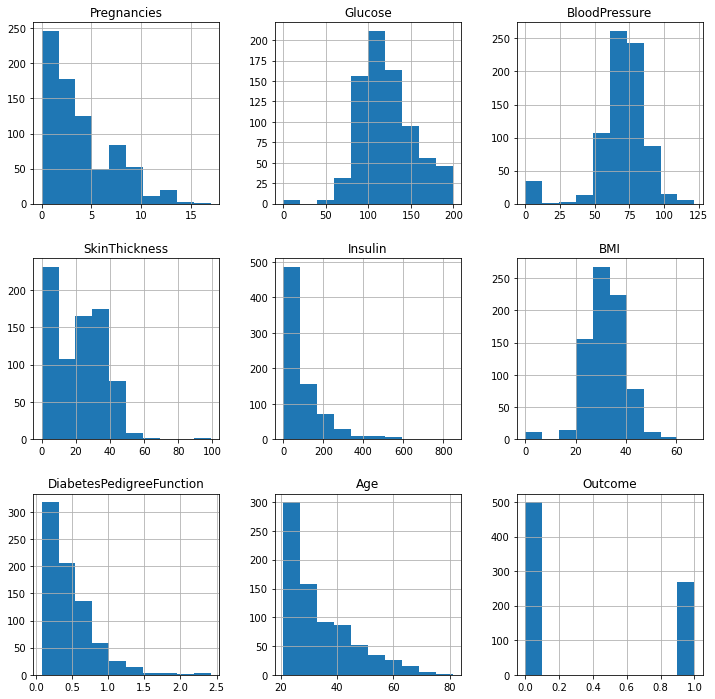

In [30]:
df_raw.hist(figsize=(12,12))
plt.show()

In [31]:
df_raw = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter = df_raw.copy()
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


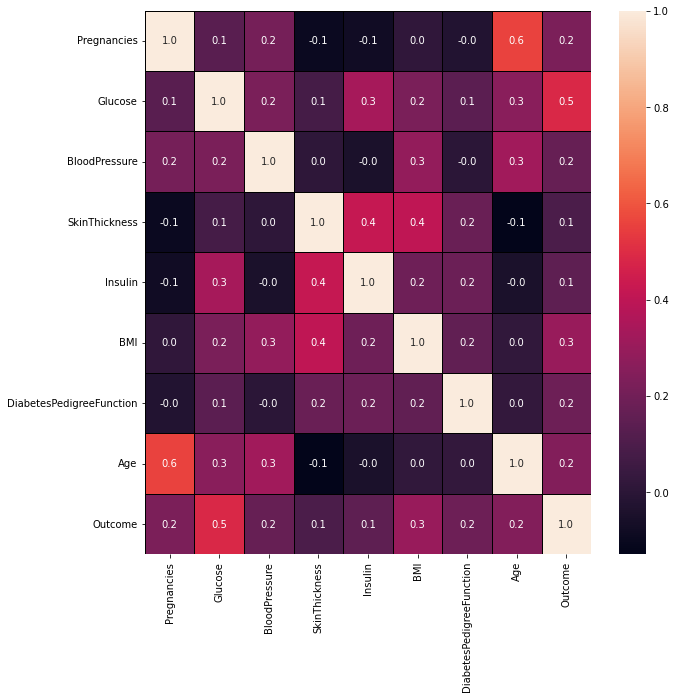

In [32]:
# correlación 
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df_raw.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [7]:
# separacion de variable:
X= df_filter.iloc[:, :8]
y= df_filter.iloc[:, 8]

In [8]:
# vemos algunos datos de la variable X 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
# vemos algunos datos de la variable y 
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
#Contamos los valores nulos de las columnas:
X[X.columns].isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [11]:
# mirando que tipo de variables tenemos en X y observamos que son todas númericas
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.9 KB


**MODEL USING DESICION TREE**

In [34]:
# Separo la data en train y en test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [35]:
# modelo de train simple 
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6685082872928176

In [36]:
# un poco desvalanceado los datos que si tienen con los que no tienen Deabetes:
y_train.value_counts() 

0    352
1    191
Name: Outcome, dtype: int64

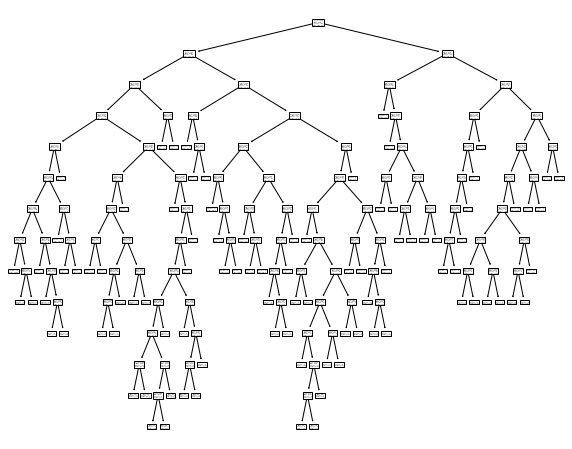

In [37]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()

In [38]:
# Haciendo Predicciones:
# mirar el dataset de predicción:
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(clf.predict(X_test))], axis=1)

,Outcome,0
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
176,1,0
177,1,0
178,0,0
179,0,1


In [39]:
# modelo un poco más complejo:
accuracies = list()
nro_feature = X_train.columns.size
depth_range = range(1, nro_feature+1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             random_state=0)
    tree_model.fit(X_train, y_train)
    accuracies.append(tree_model.score(X_test, y_test))
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.773481
         2          0.767956
         3          0.779006
         4          0.729282
         5          0.718232
         6          0.718232
         7          0.685083
         8          0.679558


In [40]:
# criterion: sirve para medir la calidad de la división puede ser gini(por defecto) o entropy.
# Split:La estrategia utilizada para elegir la división en cada nodo. Las estrategias admitidas son "best" para elegir la mejor división y "Random" para elegir la mejor división aleatoria.
# max_depth: La profundidad máxima del árbol. Si es Ninguno, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split samples.
clf1 = DecisionTreeClassifier(criterion='entropy',
                              splitter='best',
                             min_samples_split=20,
                             min_samples_leaf=5,
                             random_state=0, max_depth=3)

clf1.fit(X_train, y_train)
print('Accuracy:',clf1.score(X_test, y_test))

Accuracy: 0.7790055248618785


***es el mejor resultado que obtuve con un arbol de menor profundidad***

In [41]:
# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_filter.columns[1:], clf1.feature_importances_):
    print(name + ': ' + str(importance))

Glucose: 0.0
BloodPressure: 0.5422783779496009
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.290117815175049
Age: 0.0
Outcome: 0.16760380687535012


In [42]:
#show predicted dataset
clf1_pred=clf1.predict(X_test)

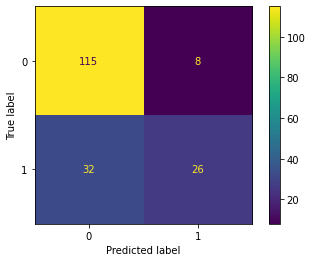

In [43]:
cm = confusion_matrix(y_test, clf1_pred, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()

plt.show()

***En la matiz de confusión vemos un dato positivo que los falsos positivos sea bajo, ya que es baja la cantidad en los datos de las personas que no tiene la enfermedad y se predijo que tenian la enfermedad.***

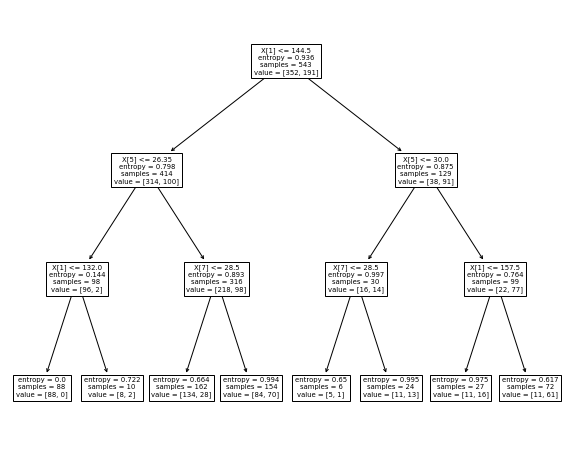

In [44]:
plt.figure(figsize=(10,8))
plot_tree(clf1)
plt.show()

**VERSION WITHOUT COLUMN**

In [45]:
# en este caso vamos a sacar las columnas que no aportan:
X2 = df_filter[['BloodPressure','DiabetesPedigreeFunction']]
y2 = df_filter[['Outcome']]

In [46]:
#Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2,random_state=34)

In [47]:
clf2 = DecisionTreeClassifier(criterion='entropy',
                             min_samples_split=20,
                             min_samples_leaf=20,
                             random_state=0, max_depth=3)

clf2.fit(X2_train, y2_train)
print('Accuracy:',clf2.score(X2_test, y2_test))

Accuracy: 0.6629834254143646


In [48]:
#show predicted dataset
clf2_pred=clf2.predict(X2_test)

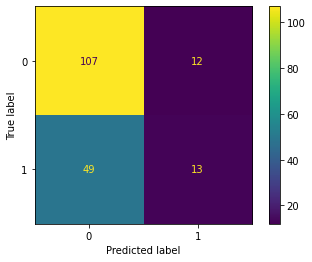

In [49]:
cm2 = confusion_matrix(y2_test, clf2_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp.plot()

plt.show()

In [50]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[20,30],
                      min_samples_leaf=[5,10])

In [51]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'max_features': range(1, 9),
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [20, 30]})

In [52]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

Best Criterion: gini
Best max_depth: 4
Best min_samples_split: 30
Best min_samples_leaf: 10
Best Number Of Components: 4


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}